In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats 

### The importance of bat speed. 

Questions to anwser: 
- Does and increase in bat speed result in more swings and misses? 
- If so, is the increase in swinging strikes worth the power increase? 
- What other stats correlate with bat speed? 

In [38]:
pd.set_option('display.max_columns', None)  # Show all columns

In [39]:
#read in data
data = pd.read_csv('batSpeed.csv')
data = pd.DataFrame(data)

# drop unnecessary columns 
data = data.drop([
        "pos3_int_start_distance",
        "pos4_int_start_distance",
        "pos5_int_start_distance",
        "pos6_int_start_distance",
        "pos7_int_start_distance",
        "pos8_int_start_distance",
        "pos9_int_start_distance",
        "pitches",
        "total_pitches",
        'bb'], axis = 1)

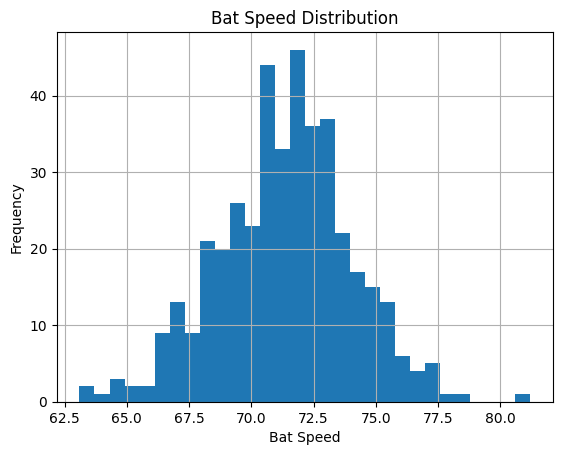

In [40]:
# Distribution of bat_speed 
data['bat_speed'].hist(bins=30)
plt.title('Bat Speed Distribution')
plt.xlabel("Bat Speed")
plt.ylabel('Frequency')
plt.show()


In [41]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['bat_speed'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 0.4113048315048218


Since p = 0.411 > 0.05 

- fail to reject null hypothesis 
- Bat Speed is likely normally distributed 

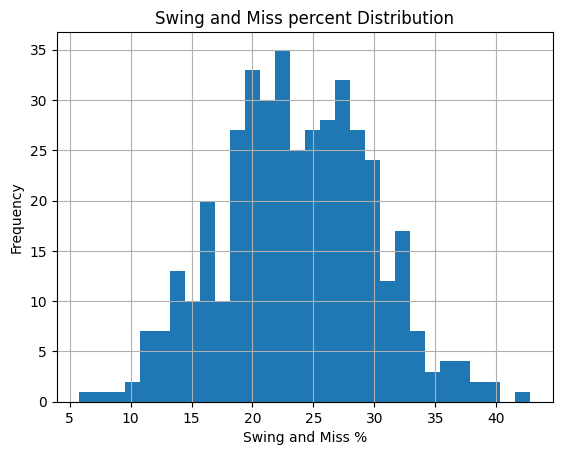

In [42]:
#Distribution of swing and miss percent

data['swing_miss_percent'].hist(bins=30)
plt.title('Swing and Miss percent Distribution')
plt.xlabel("Swing and Miss %")
plt.ylabel('Frequency')
plt.show()

In [43]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['swing_miss_percent'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 0.8801288604736328


Since p = 0.88 > 0.05 

- fail to reject null hypothesis 
- Swing and Miss Percent is likely normally distributed 

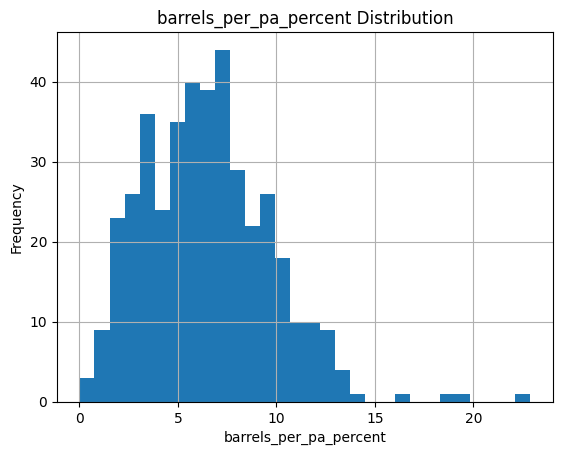

In [44]:
#Distribution of barrels per plate apperance

data['barrels_per_pa_percent'].hist(bins=30)
plt.title('barrels_per_pa_percent Distribution')
plt.xlabel("barrels_per_pa_percent")
plt.ylabel('Frequency')
plt.show()

In [45]:
#Run Shapiro-Wilk test to check for normallity 
stat, p = shapiro(data['barrels_per_pa_percent'])
print(f'Shapiro-Wilk Test p-value: {p}')

Shapiro-Wilk Test p-value: 6.060781032601881e-08


Since p = 0.00000006 < 0.05 

- Reject null hypothesis 
- barrels_per_pa_percent is likely not normally distributed 

Now I will create a data frame identifying what stats are normially distributed.

This should make it easier to find correlations later as the distribution of the stat will dictate what correlation formula we will use. 

In [46]:
column_n = np.array([])
p_value = np.array([])

for column in data.columns: 
    if column == 'player_name':
        continue
    stat, p = shapiro(data.select_dtypes(include=[np.number])[column])
    column_n = np.append(column_n, column)
    p_value = np.append(p_value, p)

p_values = pd.DataFrame({"Stat" : column_n, 'p_value': p_value})
p_values["Normality"] = p_values['p_value'] > 0.05

C:\Users\Griffin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [47]:
p_values

,Stat,p_value,Normality
0,player_id,2.517046e-20,False
1,pitch_percent,1.723264e-01,True
2,ba,2.569350e-01,True
3,iso,2.383090e-04,False
4,babip,5.361084e-01,True
5,slg,5.176713e-05,False
6,woba,4.850136e-04,False
7,xwoba,3.493438e-09,False
8,xba,2.433493e-02,False
9,hits,4.477407e-08,False


Before I go looking for correlations I should look at removing some outliers to ensure that the data is clean. 

In [48]:
#Create Z_score dataframe to identify outliers

#Z-scores
numeric_cols = data.select_dtypes(include=[np.number])
zscores = stats.zscore(numeric_cols)

#Create data frame and add player names back 
z_scores_df = pd.DataFrame(zscores, columns=numeric_cols.columns)
z_scores_df['player_name'] = data['player_name']

z_scores_df


,player_id,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle,player_name
0,0.709196,2.378320,0.975432,0.831424,1.715571,1.049377,1.095129,0.024490,-0.241914,2.150170,1.998172,-0.007118,1.180417,0.914493,-0.576647,-0.195055,3.542330,2.448705,NaN,1.530100,-1.244803,-0.701152,0.701152,-0.026464,0.525710,1.992872,1.554317,1.613814,3.284481,1.408429,1.348818,3.162838,1.101788,NaN,1.067482,-1.540780,-1.647158,0.726027,-0.417879,1.920724,0.156492,0.325089,0.199880,0.231355,0.282333,1.852782,-1.399631,0.988617,1.185803,1.027877,-0.262047,0.163088,-1.027877,1.903661,1.934432,1.700550,1.902785,1.320167,-0.107606,"Tovar, Ezequiel"
1,-0.418308,0.358400,-0.062714,0.768340,-0.009625,0.557955,0.353322,0.632323,0.153739,1.247393,1.551712,1.291677,0.704342,-0.110975,1.726501,1.988243,2.405812,2.273697,NaN,1.530100,1.381569,1.194325,-1.194325,0.910231,0.001273,1.558442,1.244955,0.833069,1.603330,-0.233852,1.584091,2.349906,0.825261,NaN,-1.445959,1.069578,0.617313,-0.151021,0.774707,1.836170,1.190249,1.285595,1.211707,1.420356,-0.150625,0.780064,1.175736,-0.082871,1.982570,0.082594,0.171251,0.760862,-0.082594,-0.302749,-0.355355,-0.302021,-0.379618,0.430052,-0.107606,"Olson, Matt"
2,-0.000668,0.679751,0.860082,1.273012,0.659854,1.325053,1.291490,1.118588,0.549393,1.876601,1.779154,0.118572,1.505013,1.550990,1.726501,1.883444,2.378426,2.068252,NaN,0.744063,0.665286,-1.577453,1.577453,0.835296,2.099020,1.758948,1.534982,1.440315,1.963577,-0.781280,2.407544,2.106027,0.445036,NaN,-1.549358,1.134994,0.190404,1.492105,0.015789,1.328848,0.360020,1.165809,1.181649,0.033188,0.017748,-0.292654,1.175736,0.901739,2.115365,1.469778,0.532331,1.307762,-1.469778,0.683094,0.766173,0.175866,0.510132,0.591891,1.209235,"Adames, Willy"
3,-0.370380,0.610890,-0.264576,1.919624,-1.606074,1.337038,0.855133,0.267623,-0.673537,1.302107,1.737035,0.495641,2.132566,0.666966,0.309179,0.206671,1.077592,2.045425,NaN,-0.041973,-0.050998,-0.224901,0.224901,0.647957,-0.260945,1.733885,1.738001,0.572820,0.522591,0.313575,3.466269,1.130508,-0.367263,NaN,-0.061333,-0.132549,-0.348190,-1.182345,0.449456,1.328848,0.476101,1.069517,1.262444,-0.759479,-0.198731,-0.185382,0.122177,-0.285585,2.181762,0.765388,-0.659236,0.659114,-0.765388,0.448369,0.392331,1.359203,1.090404,-0.686638,0.067973,"Santander, Anthony"
4,-0.998094,1.919247,-0.005040,0.279438,-0.138371,0.210364,0.178779,0.535069,0.729235,1.384178,1.678069,-0.258498,0.228268,0.949854,-2.348299,-2.273555,2.529049,1.912266,NaN,-0.041973,0.426525,0.918100,-0.918100,0.198343,0.787928,1.658695,1.631657,1.180067,1.603330,1.408429,0.878274,1.211801,-0.246282,NaN,2.586217,-2.470640,-3.120327,0.356183,-0.309462,0.314203,-0.229914,0.108219,0.190224,1.618523,0.065854,1.423695,0.941611,0.032966,0.986611,0.136944,0.712872,0.442897,-0.136944,-0.959977,-0.869388,-0.393046,-0.534357,0.915570,0.770288,"Castellanos, Nick"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.866168,-0.008858,-0.149226,-0.241006,-0.601856,-0.233114,-0.235760,0.948395,1.232795,-1.433579,-1.615626,0.034778,-1.416353,0.348717,-2.171134,-1.871828,-1.428225,-1.641166,NaN,1.530100,1.620330,-0.215376,0.215376,0.348214,0.263491,-1.616234,-1.481294,-1.422418,-1.278642,-0.233852,-1.003905,-1.633461,-1.214127,NaN,0.984142,

Lets look at some outliers! I'm going to use the z_scores data frame I've made to identify some players that are outliers in some important stats. 

To start? Bat speed of course! 

In [49]:
#return bat speed outliers that are at least 3 standard devations from the mean. 

#Find players using z_scores
batSpeed_outliers = z_scores_df.loc[np.abs(z_scores_df['bat_speed']) >= 3]

#Display players
data.iloc[batSpeed_outliers.index]

,player_id,player_name,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle
59,650333,"Arraez, Luis",39.7,0.312,0.089,0.315,0.401,0.308,0.311,0.310,158,506,86.7,15.0,2237,90.2,90.42,56,959,0,0.2,6.49,13.6,-13.6,63.1,6.0,507,493,124,27,3,4,14,2.8,0,2.12732,0.72341,0.47132,-0.26583,90.1,172,23.326572,1.825558,1.775148,5.69,-0.87,-0.11,2.31,0.312,9,-1.416058,0.310,0.407,1.416058,0.002,0.002,-0.006,-0.003,5.8,36.6
165,519317,"Stanton, Giancarlo",39.0,0.267,0.285,0.283,0.552,0.343,0.372,0.288,90,337,95.7,15.9,2267,88.8,89.13,230,715,0,0.3,6.53,-2.1,2.1,81.2,8.6,339,252,46,18,0,26,87,25.7,0,2.32158,0.62979,0.26245,-0.08038,95.7,176,58.333333,21.825397,16.224189,5.80,-0.69,0.06,2.42,0.265,55,0.295944,0.288,0.592,-0.295944,-0.021,-0.023,-0.040,-0.029,32.2,39.9


Now lets take a look back at bat speed distribution and high light our ourliers 

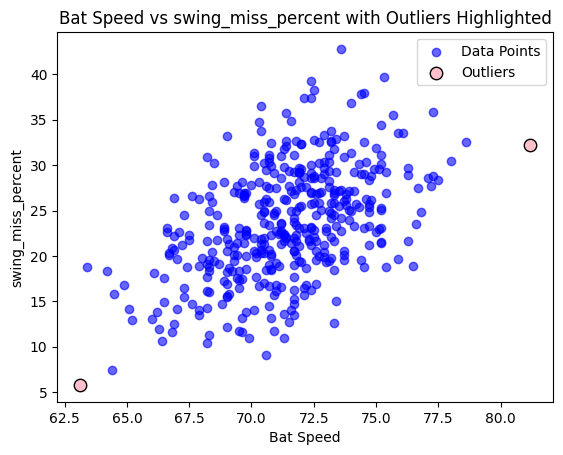

In [50]:
y_col = 'swing_miss_percent' #copmpare bat speed to 


# Find outlier indices where z-score is ≥ 3 or ≤ -3
outlier_indices = z_scores_df.index[(np.abs(z_scores_df['bat_speed']) >= 3)]
outlier_x_values = data.loc[outlier_indices, 'bat_speed']
outlier_y_values = data.loc[outlier_indices, y_col]

# Create scatter plot
plt.scatter(data['bat_speed'], data[y_col], color='blue', label='Data Points', alpha=0.6)
#need to be second to cover origonal point
plt.scatter(outlier_x_values, outlier_y_values, color='pink', label='Outliers', s=80, edgecolor='black')

# Labels and title
plt.title(f'Bat Speed vs {y_col} with Outliers Highlighted')
plt.xlabel("Bat Speed")
plt.ylabel(y_col) 
plt.legend()
plt.show()

In [51]:
#Outliers in high swing and miss percent

#return bat speed outliers that are at least 3 standard devations from the mean. 

#Find players using z_scores
swingMiss_outliers = z_scores_df.loc[np.abs(z_scores_df['swing_miss_percent']) >= 3]

#Display players
data.iloc[swingMiss_outliers.index]



,player_id,player_name,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle
398,668832,"McCann, Kyle",39.3,0.282,0.173,0.377,0.455,0.315,0.265,0.214,31,110,91.0,13.4,2271,88.1,88.35,107,250,0,0.3,6.42,3.1,-3.1,73.6,7.8,110,74,22,4,0,5,36,32.7,0,2.51572,0.54197,0.2592,-0.28304,92.2,146,39.189189,12.162162,8.181818,5.71,-1.67,-0.13,2.43,0.282,9,-1.2244,0.214,0.412,1.2244,0.068,0.068,0.043,0.05,42.8,35.9


In [52]:
#Outliers in swing_length
 

#Find players using z_scores
swingLength_outliers = z_scores_df.loc[np.abs(z_scores_df['swing_length']) >= 3]

#Display players
data.iloc[swingLength_outliers.index]


,player_id,player_name,pitch_percent,ba,iso,babip,slg,woba,xwoba,xba,hits,abs,launch_speed,launch_angle,spin_rate,velocity,effective_speed,whiffs,swings,takes,eff_min_vel,release_extension,pitcher_run_exp,run_exp,bat_speed,swing_length,pa,bip,singles,doubles,triples,hrs,so,k_percent,bb_percent,api_break_z_with_gravity,api_break_z_induced,api_break_x_arm,api_break_x_batter_in,hyper_speed,bbdist,hardhit_percent,barrels_per_bbe_percent,barrels_per_pa_percent,release_pos_z,release_pos_x,plate_x,plate_z,obp,barrels_total,batter_run_value_per_100,xobp,xslg,pitcher_run_value_per_100,xbadiff,xobpdiff,xslgdiff,wobadiff,swing_miss_percent,arm_angle
59,650333,"Arraez, Luis",39.7,0.312,0.089,0.315,0.401,0.308,0.311,0.310,158,506,86.7,15.0,2237,90.2,90.42,56,959,0,0.2,6.49,13.6,-13.6,63.1,6.0,507,493,124,27,3,4,14,2.8,0,2.12732,0.72341,0.47132,-0.26583,90.1,172,23.326572,1.825558,1.775148,5.69,-0.87,-0.11,2.31,0.312,9,-1.416058,0.310,0.407,1.416058,0.002,0.002,-0.006,-0.003,5.8,36.6
69,668930,"Turang, Brice",37.5,0.253,0.091,0.283,0.344,0.256,0.271,0.272,109,430,86.8,6.4,2244,90.0,90.29,128,926,0,0.3,6.46,26.0,-26.0,66.2,6.1,433,373,84,16,4,5,60,13.9,0,2.19600,0.65915,0.46312,-0.29006,90.3,161,28.150134,2.144772,1.847575,5.71,-1.19,-0.07,2.37,0.252,8,-2.803888,0.271,0.351,2.803888,-0.019,-0.019,-0.007,-0.015,13.8,38.0
165,519317,"Stanton, Giancarlo",39.0,0.267,0.285,0.283,0.552,0.343,0.372,0.288,90,337,95.7,15.9,2267,88.8,89.13,230,715,0,0.3,6.53,-2.1,2.1,81.2,8.6,339,252,46,18,0,26,87,25.7,0,2.32158,0.62979,0.26245,-0.08038,95.7,176,58.333333,21.825397,16.224189,5.80,-0.69,0.06,2.42,0.265,55,0.295944,0.288,0.592,-0.295944,-0.021,-0.023,-0.040,-0.029,32.2,39.9
303,595879,"Báez, Javier",41.5,0.184,0.126,0.204,0.311,0.209,0.275,0.243,38,206,89.3,11.3,2295,87.8,88.05,123,427,0,0.3,6.43,12.8,-12.8,74.8,8.6,208,167,22,11,0,5,41,19.7,0,2.50902,0.49373,0.06539,-0.06911,92.3,144,43.113772,9.580838,7.692308,5.63,-1.19,0.18,2.25,0.183,16,-3.007494,0.243,0.396,3.007494,-0.059,-0.060,-0.085,-0.066,28.8,37.6


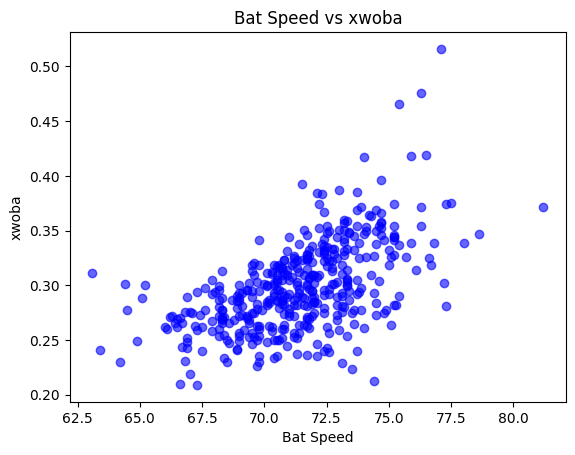

In [53]:
y_col = 'xwoba' #copmpare bat speed to 


# Find outlier indices where z-score is ≥ 3 or ≤ -3
outlier_indices = z_scores_df.index[(np.abs(z_scores_df['bat_speed']) >= 3)]


# Create scatter plot
plt.scatter(data['bat_speed'], data[y_col], color='blue', label='Data Points', alpha=0.6)


# Labels and title
plt.title(f'Bat Speed vs {y_col}')
plt.xlabel("Bat Speed")
plt.ylabel(y_col) 
plt.show()

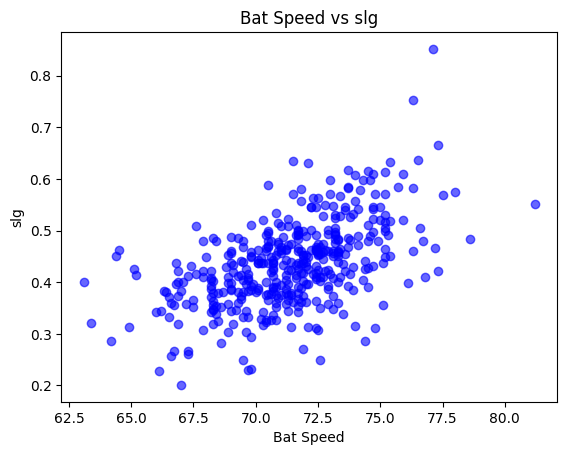

In [54]:
y_col = 'slg' #copmpare bat speed to 


# Find outlier indices where z-score is ≥ 3 or ≤ -3
outlier_indices = z_scores_df.index[(np.abs(z_scores_df['bat_speed']) >= 3)]


# Create scatter plot
plt.scatter(data['bat_speed'], data[y_col], color='blue', label='Data Points', alpha=0.6)


# Labels and title
plt.title(f'Bat Speed vs {y_col}')
plt.xlabel("Bat Speed")
plt.ylabel(y_col) 
plt.show()